# CAPSTONE 1
## AN  ANALYSIS OF MUSIC DATASET

In this notebook we will be exploring a dataset focused on music and mental health.
Dataset:mxmh_survey_results.csv
location: This file is stored in my 'Data Capstone File' where I have my Jupyter notebook.

Source:Kaggle. Was compiled by Catherine Erasgaitis 

Goal: The goal is to explore the possible relationship that exists between Mental health disorders and Music ; the association between music genre and mental health conditions.

Why this data: I find that understanding the association between music and mental health conditions is important. It could inform recommendations for music therapy.. moreso guide the devt of new features in music streaming apps to support mental health.

Tools and Libraries:I will be using Lambda, NumPy, Pandas, Matplotlib, and some statistical tests 

Hypotheses: 
1. Age and Genre Preferences: There is a relationsip between the age of lthe listener and their favorite genre of music
2. Music and Mood: Listening to certain genres of music is associated with levels of anxiety, depression, insomnia, and ocd. 
(What genre of music, trends in disorder... least affected? mst affected)
3. Working and Music: People who listen to music while working have a preference for certain genres or BPM(Beats Per Minute).
4. Streaming Service and Genre: The primary streaming service used by a listener influences their genre preference.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# load data
music_df = pd.read_csv('mxmh_survey_results.csv') #sep = ';'
music_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [58]:
# print keys to get a fair idea of what my data contains
print(music_df.keys())

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')


# Preparing data for analysis

In [59]:
# Look for duplicate data
# drop duplicates before starting
# NO duplcates found

In [60]:
# # using music_df
# are there any missing values?finding missing values
music_df_fill = music_df[music_df.isnull().any(axis=1)]
music_df_fill
# replace all NaN with N/A for clarity 
music_df = music_df.fillna('N/A') #df returned to original name music_df
music_df

# music_df['Age'] = music_df_fill['Age'].fillna(N/A)
# # READY TO BE ANALYZED

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,N/A,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,N/A,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [61]:
# Exploratory Analysis
print(music_df.describe())

       Hours per day     Anxiety  Depression    Insomnia         OCD
count     736.000000  736.000000  736.000000  736.000000  736.000000
mean        3.572758    5.837636    4.796196    3.738451    2.637228
std         3.028199    2.793054    3.028870    3.088689    2.842017
min         0.000000    0.000000    0.000000    0.000000    0.000000
25%         2.000000    4.000000    2.000000    1.000000    0.000000
50%         3.000000    6.000000    5.000000    3.000000    2.000000
75%         5.000000    8.000000    7.000000    6.000000    5.000000
max        24.000000   10.000000   10.000000   10.000000   10.000000


# OVERVIEW -> what do I have in my music_df?
Based off the description above, I have made the following observations on my dataset:

a. Hours per day: On average, people listen to music for about 3.57 hours per day. The standard deviation is approximately 3.03 This indicates a wide spread in this data. The minimum is 0 hours (perhaps these individuals don’t listen to music daily), and the maximum is 24 hours (indicating some individuals leave music playing all day).

b. Anxiety, Depression, Insomnia, OCD: These columns seem to represent some form of rating or score related to these mental health conditions. The scales might be from 0 to 10, given the minimum and maximum values.

c. The mean values for these conditions are 5.84 (Anxiety), 4.80 (Depression), 3.74 (Insomnia), and 2.64 (OCD). This suggests that, on average, the individuals in this dataset have moderate levels of these conditions, with anxiety being the highest.

d. Variability: The standard deviations for the mental health conditions suggest a fair amount of variability in these scores among my dataset. This could indicate a diverse group of individuals with varying levels of these conditions.

e. Distribution: The 25%, 50% (median), and 75% percentiles give us a sense of the distribution of the data. For example, half of the individuals listen to music for 3 hours or less per day, and half have an anxiety score of 6 or less.


What are the common ages in this dataset?

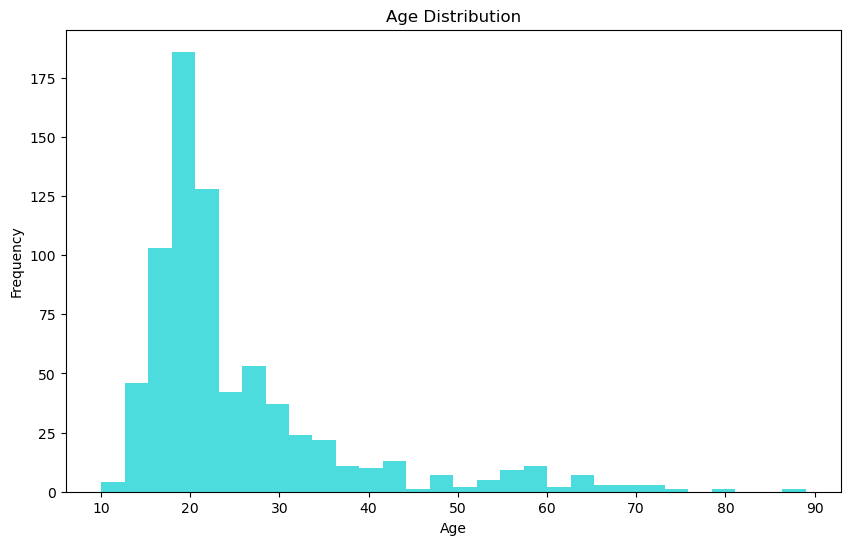

In [62]:
# music_df.hist(['Age'], bins = 30, color = 'darkturquoise', grid = False)

# handle N/A
music_check = music_df[music_df['Age'] != 'N/A']
music_check.loc[:, 'Age'] = music_check['Age'].astype(int)

plt.figure(figsize=(10,6))
plt.hist(music_check['Age'], bins= 30, alpha=0.7, color='darkturquoise')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

are there any outliers?

In [30]:
max_age = music_check['Age'].max()
max_age

89

Which streaming services are most popular?

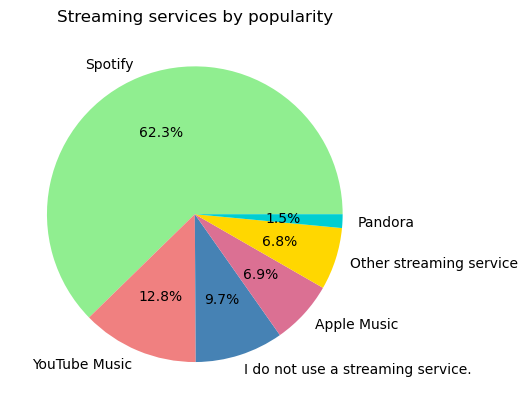

From this chart we can see that Spotify is the most popular streaming service with 62.3%


In [64]:
# define colors
# using 'autopct parameter to format the values in percent'

pie_colors = ['lightgreen', 'lightcoral', 'steelblue', 'palevioletred', 'gold', 'darkturquoise']

# filtering our rows where "Primary service" is N/A
music_noNA_df = music_df[music_df['Primary streaming service'] != 'N/A']

# creating a pie chart to show data.
services = music_noNA_df['Primary streaming service'].value_counts()
services.plot(kind='pie', colors = pie_colors, autopct = '%1.1f%%')

plt.title('Streaming services by popularity')
plt.ylabel("")
plt.show()


print('From this chart we can see that Spotify is the most popular streaming service with 62.3%')

what is the age distribution across different primary streaming services?


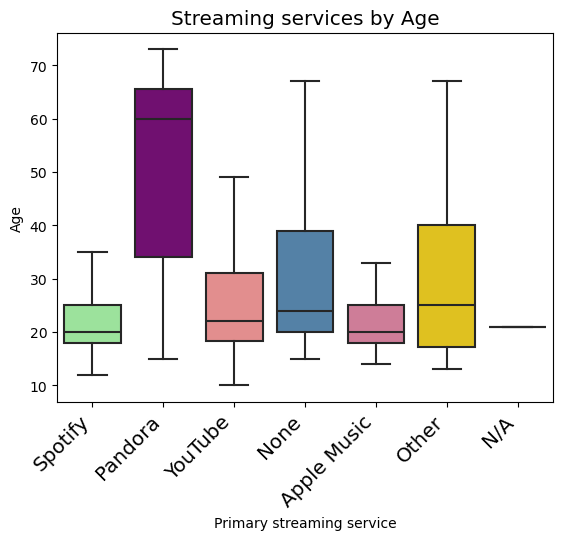

In [40]:
# Imports the seaborn library.
# Define a color palette.(use pie_color?)
# Replace certain values in the ‘Primary streaming service’ column with more general categories.
# Create a boxplot of ‘Age’ for each category of ‘Primary streaming service’, without showing outliers (fliers).
# Set the title of the plot to ‘Streaming services by Age’.
# goal: which streaming services are favored by different generations
# music_check = music_df[music_df['Age'] != 'N/A']
music_df.loc[:,'Age'] = music_check['Age'].astype(int)

import seaborn as sns

box_colors= ['lightgreen', 'purple', 'lightcoral', 'steelblue', 'palevioletred', 'gold']

music_df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=music_df, x="Primary streaming service", y = "Age",
            showfliers = False,
            palette = box_colors)
bplot.set_xticklabels(bplot.get_xticklabels(),rotation=45, horizontalalignment = 'right',
                     fontweight = 'light', fontsize = 'x-large')

plt.title('Streaming services by Age', fontsize = 'x-large', loc = 'center')
plt.show()

# fig.savefig('../Data_analytics assignment/Age distribution.png)

In [42]:
# getting the median age for each primary service
median_distribution = music_df.groupby(['Primary streaming service'])
median_distribution_age = median_distribution['Age'].median().to_dict()
median_distribution_age

{'Apple Music': 20.0,
 'N/A': 21.0,
 'None': 24.0,
 'Other': 25.0,
 'Pandora': 60.0,
 'Spotify': 20.0,
 'YouTube': 22.0}

#Observations
Spotify’s User Range: Spotify shows the widest age range from the boxplot, indicating its popularity across various age groups. It also has a younger userbase.

Pandora & YouTube: Both have a broad age range but fewer older users compared to Spotify. Pandora has the oldest user (median - 60 years old)

Service Non-users: this group does not use streaming services, skewing towards an older demographic.

Apple Music’s Demographic: Apple Music appears to have a younger user base too , with a more concentrated age distribution.

Other Services: The ‘Other’ category has less variation in user age, indicating a more uniform age group.

# Testing Hypothesis

What is the favorite genre of music for each age group?

In [43]:
# group data by age column
# find the most common value withing each group
#  I will be using lambda x iss count of values of the fav_genre column 
# index[0] to return the most common among Age groups..
favorite_genre_group = music_df.groupby('Age')['Fav genre']
favorite_genre_by_age =favorite_genre_group.agg(lambda x: x.value_counts().index[0]).reset_index()
favorite_genre_by_age

print(f'For each age group surveyed, the favorite genre of music per group is as follows: \n {favorite_genre_by_age}')

For each age group surveyed, the favorite genre of music per group is as follows: 
      Age  Fav genre
0   10.0        Pop
1   12.0  Classical
2   13.0        Rap
3   14.0  Classical
4   15.0       Rock
..   ...        ...
56  72.0       Rock
57  73.0        R&B
58  74.0        Pop
59  80.0  Classical
60  89.0        Rap

[61 rows x 2 columns]


What is the most popular genre among different age groups?

In [44]:
# favorite genre for each group
# groupby age and favorite genre

popular_genre = music_df['Fav genre'].mode()[0]
popular_genre




'Rock'

Is there a correlation between the hours spent listening to music per day and mental health indicators (anxiety, depression, insomnia, OCD)?

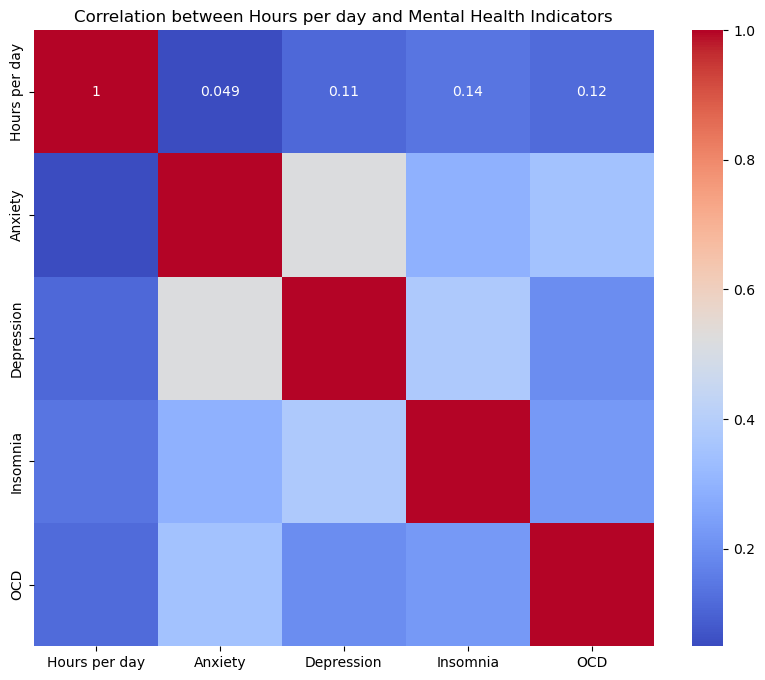

In [48]:
# calculate correlation using corr
# corr : used to find out how closely related different genres of music are to levels of anxiety, depression, insomnia and ocd
# observe relationships in dataset..
# plot a heatmap... {}
# heatmap[this is a graphical representation of data where individual values contained in a matrix are represented as colors]
# The color in each cell of the heatmap would represent the strength and direction (positive or negative) of the correlation

selected_columns = music_df[['Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]

# Compute correlation matrix
corr_matrix = selected_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Hours per day and Mental Health Indicators')
plt.show()


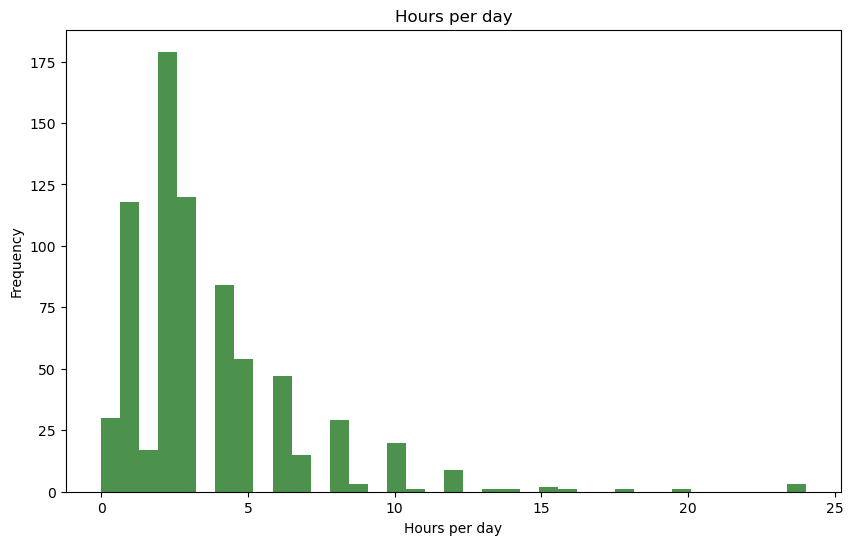

In [47]:
# Breakdown
# Visualizing the hour per day column
# how many hours do people spend listening to music
plt.figure(figsize=(10,6))
plt.hist(music_df['Hours per day'], bins= 'auto', alpha=0.7, color='darkgreen')
plt.title('Hours per day')
plt.xlabel('Hours per day')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [49]:
hour_count = music_df['Hours per day'].value_counts().loc[lambda x : x>100].reset_index()
hour_count.columns = ['Hours per day', 'Count']
print(hour_count)


   Hours per day  Count
0            2.0    173
1            3.0    120
2            1.0    117


#Observation

based on this histogram, The most common range is between 0-1 hour per day. there is also a significant decrease in frequency as the number of hours increase. Also very few people reported to have listened to music for 20-24 hours.

from the hour_count, we can say that majority of the sample population listen to music between 0-4hours per day

# Music and Mood: Listening to certain genres of music is associated with levels of anxiety, depression, insomnia, and ocd
1. What is the average level of anxiety, depression, insomnia, and OCD for listeners of each genre? 
 Are certain genres more popular among listeners with certain mental health indicators? 
3. Which genres are the most commonly listened to by individuals with high levels of anxiety, depression, insomnia, or OCD? 
6. Are the average levels of anxiety, depression, insomnia, or OCD significantly different across different genres? 

In [51]:
# 1. Average level of anxiety, depression, insomnia, and OCD for listeneners of each genre
# Calculate the average
average_mental_health = music_df.groupby('Fav genre')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()

# Print the average for each genre
print(average_mental_health)



                   Anxiety  Depression  Insomnia       OCD
Fav genre                                                 
Classical         4.886792    4.075472  3.792453  2.377358
Country           5.400000    4.320000  2.720000  2.760000
EDM               5.486486    5.243243  3.972973  3.000000
Folk              6.566667    5.066667  3.633333  2.200000
Gospel            4.833333    2.666667  5.333333  0.333333
Hip hop           6.200000    5.800000  3.428571  2.714286
Jazz              5.900000    4.500000  3.850000  2.800000
K pop             6.230769    4.423077  3.461538  2.538462
Latin             4.333333    3.000000  3.333333  1.666667
Lofi              6.100000    6.600000  5.600000  3.400000
Metal             5.761364    5.068182  4.556818  2.397727
Pop               6.074561    4.486842  3.368421  2.855263
R&B               5.171429    3.828571  2.885714  2.742857
Rap               5.090909    4.000000  2.272727  3.181818
Rock              6.122340    5.236702  3.880319  2.6781

Which genres are the most commonly listened to by individuals with high levels of anxiety, depression, insomnia, or OCD?

Most common genre for individuals with high levels of anxiety is Rock
Most common genre for individuals with high levels of anxiety is Rock
Most common genre for individuals with high levels of anxiety is Rock
Most common genre for individuals with high levels of anxiety is Rock


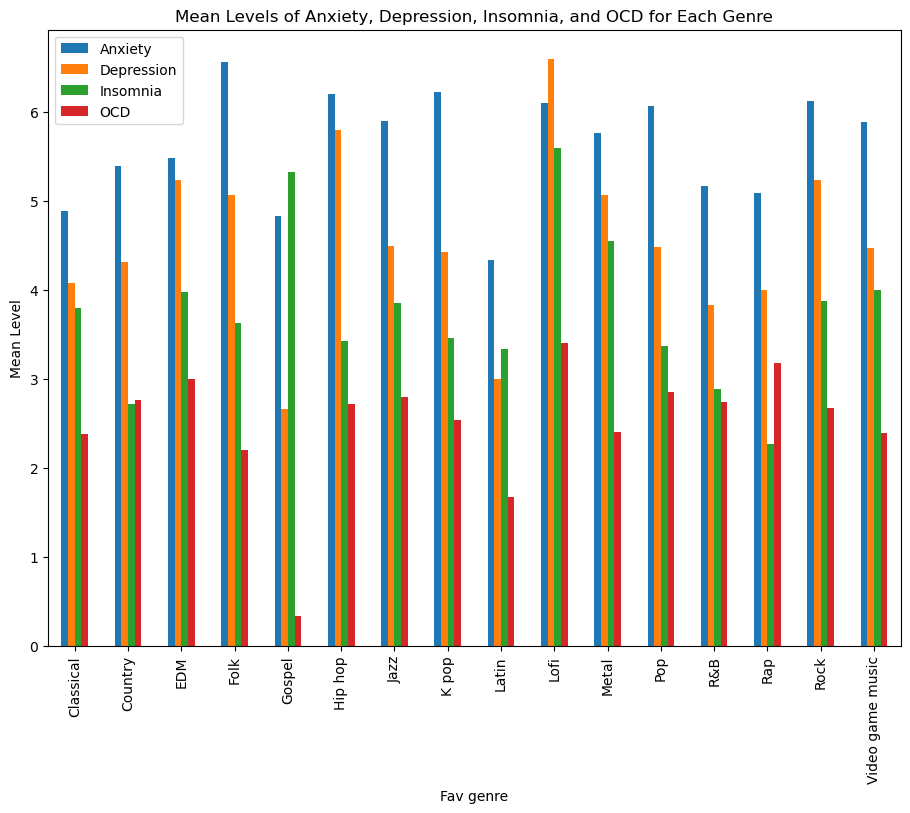

In [52]:
# Define high levels as above the mean
# that is anything beyond the average..
# find the average
# find values greater than the average
average_anxiety_level = music_df['Anxiety'].mean()
average_depression_level= music_df['Depression'].mean()
average_insomnia_level = music_df['Insomnia'].mean()
average_ocd_level = music_df['OCD'].mean()

# values above the average: high levels defined as above mean
high_anxiety = music_df[music_df['Anxiety'] > average_anxiety_level]
high_depression = music_df[music_df['Depression'] > average_depression_level]
high_insomnia = music_df[music_df['Insomnia'] > average_insomnia_level]
high_ocd = music_df[music_df['OCD'] > average_ocd_level]

# finding the most common genre for individuals with high levels of each condition
anxiety_genre = high_anxiety['Fav genre'].mode()[0]
depression_genre = high_depression['Fav genre'].mode()[0]
insomnia_genre = high_insomnia['Fav genre'].mode()[0]
ocd_genre = high_ocd['Fav genre'].mode()[0]

print(f"Most common genre for individuals with high levels of anxiety is {anxiety_genre}")
print(f"Most common genre for individuals with high levels of anxiety is {depression_genre}")
print(f"Most common genre for individuals with high levels of anxiety is {insomnia_genre}")
print(f"Most common genre for individuals with high levels of anxiety is {ocd_genre}")

# creating a visual representation of findings
mean_levels = music_df.groupby('Fav genre')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean()
# mean_levels

# ploting the mean levels 
# will be ploted on a bar chart
mean_levels.plot(kind='bar', figsize=(11,8))
plt.title('Mean Levels of Anxiety, Depression, Insomnia, and OCD for Each Genre')
plt.ylabel('Mean Level')
plt.show()



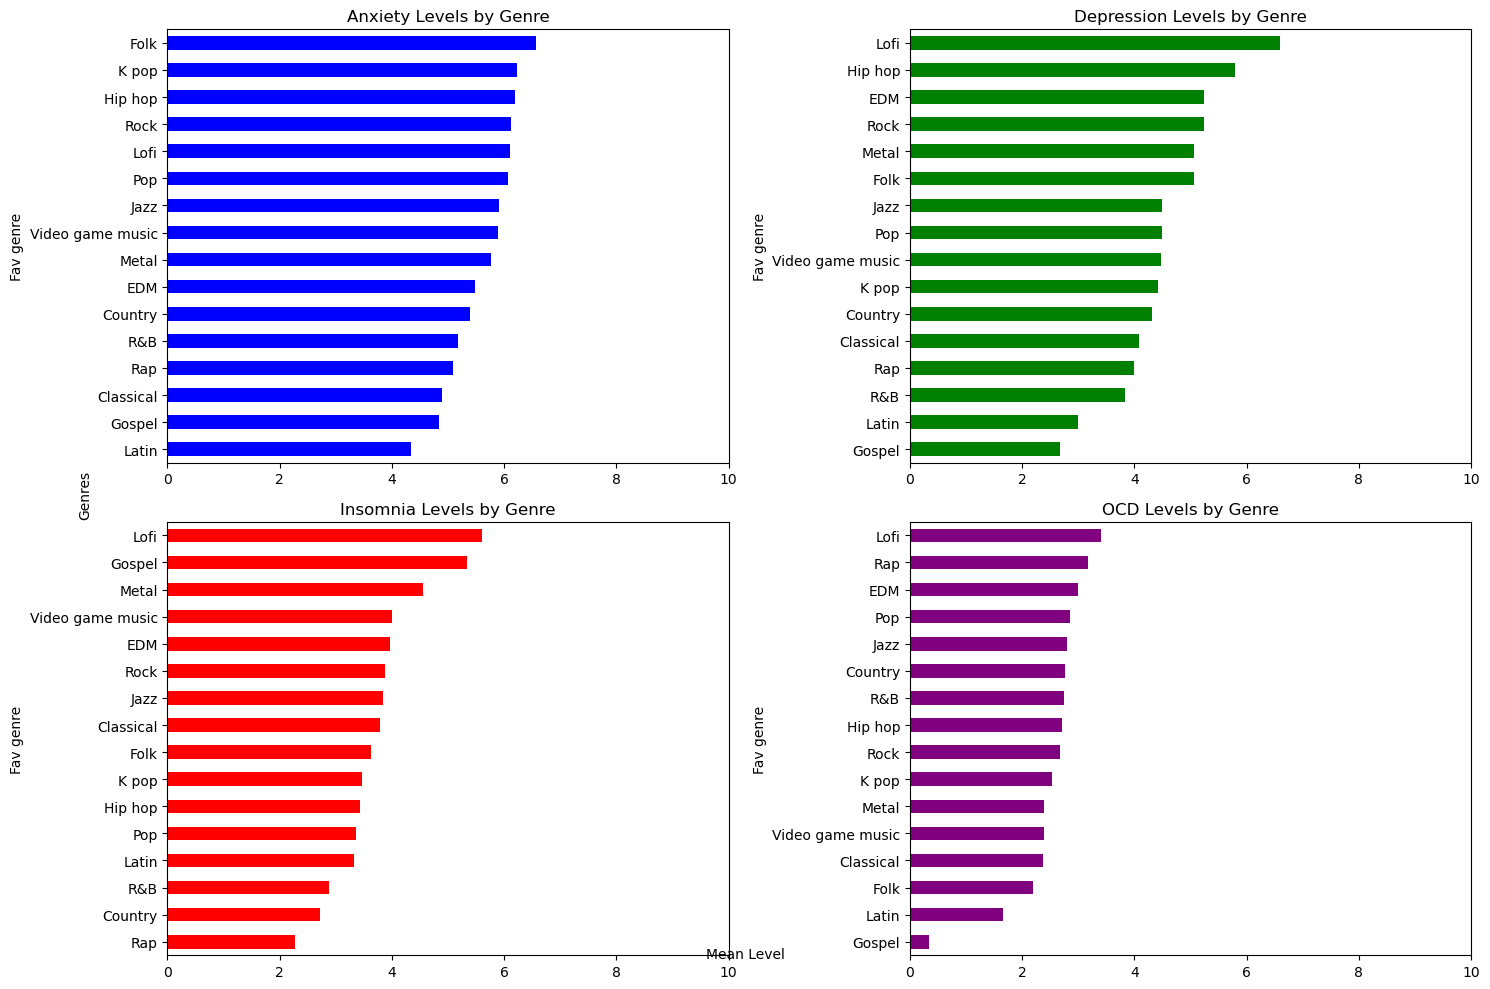

In [47]:
# subplots for better view of distribution
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Plot for each condition
mean_levels['Anxiety'].sort_values().plot(kind='barh', ax=axs[0,0], color='blue', xlim=(0,10))
mean_levels['Depression'].sort_values().plot(kind='barh', ax=axs[0,1], color='green', xlim=(0,10))
mean_levels['Insomnia'].sort_values().plot(kind='barh', ax=axs[1,0], color='red', xlim=(0,10))
mean_levels['OCD'].sort_values().plot(kind='barh', ax=axs[1,1], color='purple', xlim=(0,10))

# Setting titles
axs[0,0].set_title('Anxiety Levels by Genre')
axs[0,1].set_title('Depression Levels by Genre')
axs[1,0].set_title('Insomnia Levels by Genre')
axs[1,1].set_title('OCD Levels by Genre')

# Setting common labels
fig.text(0.5, 0.04, 'Mean Level', ha='center', va='center')
fig.text(0.06, 0.5, 'Genres', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.show()



Based on this visual representation, here are some inferences:

Genre and Mental Health Relation: Different genres of music appear to be associated with varying levels of anxiety, depression, insomnia, and OCD. 

Do these experience vary by genre? 
This suggests that listeners of certain genres might experience these conditions differently.

Folk Music: Folk genre shows high levels of anxiety and insomnia but lower levels of depression and OCD, which could indicate that the lyrical content or melodies in folk music resonate with listeners who experience anxiety and sleeplessness.

Pop Music: Pop genre has moderate to high levels across all four conditions, indicating its broad appeal and potential relation to a wide range of emotional states.

Rock Music: Rock displays high levels particularly in depression, which might reflect the intense and often emotional nature of rock music.

EDM: EDM music shows moderate to high levels across all conditions with a particular spike in insomnia. why?
possibly due to the high-energy and stimulating nature of this music.[my opinion]

Classical Music: Classical music generally shows lower levels across all conditions except for a slight increase in insomnia, suggesting it may have a calming effect on listeners.

This makes me think of previous research that suggest that classical music could be used in hospitals for therapeutic effects